### Odds Ratio VS. Risk Ratio

-  Definition

-  Example of Arthritis Dataset

- Visualization

In [33]:
#Import Library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#Read in Arthritis data
df = sm.datasets.get_rdataset("Arthritis", "vcd").data

#Create New variable Censor:
#Censor=0 means no-improvement
#Censor=1 means some or big improvement 
df["Censor"]=np.where(df["Improved"]=="None", "0", "1")

#table for Treatment and Censor
tab=pd.crosstab(df["Treatment"], df["Censor"])
tab1=sm.stats.Table(tab)
print(tab1.table_orig)

table= np.asarray([[29,14],[13,28]])
t22=sm.stats.Table2x2(table)
print(t22.summary())

Censor      0   1
Treatment        
Placebo    29  14
Treated    13  28
               Estimate   SE   LCB   UCB   p-value
--------------------------------------------------
Odds ratio        4.462       1.785 11.154   0.001
Log odds ratio    1.495 0.467 0.579  2.412   0.001
Risk ratio        2.127       0.579  2.412   0.003
Log risk ratio    0.755 0.253 0.260  1.250   0.003
--------------------------------------------------


#### Summary

- Censor=0, Arthritis problem remains
- Censor=1, Arthritis problem improved 

##### Odds Ratio
Odds Ratio= 4.462, this implies in Placebo Group has 4.5 times more likely to remain the Arthritis problem compared to the Treatment Group.

##### Risk Ratio
Risk Ratio=2.127 means in Placebo Group the patients' Arthritis problem remains increased compared to the Patients in Treatment Group.



#### Odds Ratio By step

$Odds\ in \ Placebo= \frac{29}{14}$

$Odds \ in \ Treatment= \frac{13}{28}$

$Risk \ Ratio = \frac{2.0714}{0.464}=4.46$



#### Risk Ratio
$P(censor=0 \ in \ Placebo)= \frac{29}{43}$

$P(censor=0 \ in \ Treatment)= \frac{13}{41}$

$Risk \ Ratio = \frac{0.674}{0.317}=2.127$


Text(0,0.5,'Censor Status')

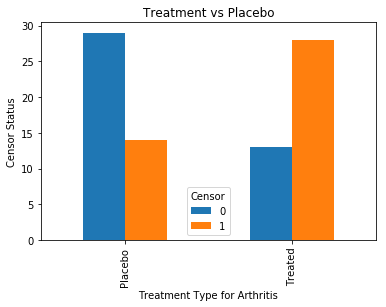

In [35]:
#Visulatization

%matplotlib inline
pd.crosstab(df.Treatment, df.Censor).plot(kind="bar")
plt.title("Treatment vs Placebo")
plt.xlabel("Treatment Type for Arthritis")
plt.ylabel("Censor Status")
